In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from sklearn.cluster import KMeans

In [73]:
X = np.load('X_av_goiener.npy')

In [74]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.preprocessing import StandardScaler


In [75]:
import kshape
import numpy as np
from kshape.core import KShapeClusteringCPU 

In [76]:
X

array([[0.11970678, 0.09709649, 0.09175548, ..., 0.29919737, 0.39838596,
        0.24071711],
       [1.47989278, 1.34629825, 1.3397193 , ..., 1.98283772, 1.74944737,
        1.65499561],
       [0.18485996, 0.10106579, 0.08415461, ..., 0.26178728, 0.40171053,
        0.29222368],
       ...,
       [0.22450109, 0.11853509, 0.07094627, ..., 0.14447807, 0.19888816,
        0.25523026],
       [0.20747921, 0.1549693 , 0.11922588, ..., 0.30059211, 0.36969518,
        0.30691009],
       [0.91788621, 0.65583114, 0.55993202, ..., 1.54789474, 1.37671491,
        1.20611623]])

In [77]:
X1 = X
X2 = X1.reshape((X1.shape[0], X1.shape[1], 1))
X2.shape

(164, 24, 1)

0.052 --> 0.053 --> 
0.042 --> 0.041 --> 0.047 --> 
0.034 --> 0.035 --> 
0.032 --> 0.033 --> 
0.031 --> 0.031 --> 


Text(0.5, 1.0, 'Elbow Method for Optimal Number of Clusters - KMeans')

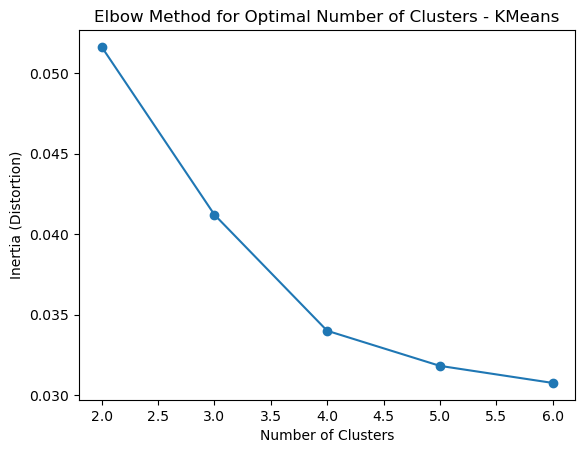

In [97]:
X_scaled = TimeSeriesScalerMeanVariance(mu=0., std=1.).fit_transform(X2)
cluster_range = range(2, 7)
inertia_values = []

for n_clusters in cluster_range:
    ks = KShape(n_clusters=n_clusters, verbose=True, random_state=0)
    ks_cluster_assignments = ks.fit_predict(X_scaled)
    labels = ks.labels_
    inertia_values.append(ks.inertia_)
    
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal Number of Clusters - KMeans')
# plt.savefig("elbow_autokshape_lp.pdf", format='pdf', bbox_inches='tight')

In [79]:
# CPU Model

# ksc = KShapeClusteringCPU(n_clusters, centroid_init='zero', max_iter=100, n_jobs=-1)
# X2a = TimeSeriesScalerMeanVariance().fit_transform(X2)
# ksc.fit(X2a)
# labels = ksc.labels_ # or ksc.predict(univariate_ts_datasets)
# cluster_centroids = ksc.centroids_


In [102]:
n_clusters =4

In [103]:
#TS learn
X2a = TimeSeriesScalerMeanVariance().fit_transform(X2)
ksc = KShape(n_clusters=n_clusters, verbose=False, random_state=2)
ksc.fit(X2a)
labels = ksc.labels_
ksc_cluster_assignments = ksc.fit_predict(X2a)
ksc.cluster_centers_.shape
cluster_centroids = ksc.cluster_centers_

In [104]:
labels

array([3, 0, 3, 2, 1, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 3, 3, 2, 1,
       2, 3, 1, 2, 0, 3, 0, 2, 3, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 3, 3, 3,
       1, 0, 1, 2, 3, 1, 0, 1, 2, 3, 1, 2, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3,
       0, 3, 1, 3, 1, 0, 1, 1, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       3, 0, 1, 0, 0, 2, 1, 0, 1, 3, 1, 0, 0, 1, 0, 0, 1, 0, 1, 3, 1, 1,
       3, 0, 0, 0, 3, 1, 1, 1, 3, 2, 1, 3, 0, 1, 3, 0, 1, 0, 2, 3, 0, 0,
       3, 1, 3, 3, 3, 2, 0, 1, 3, 0, 3, 0, 1, 0, 1, 0, 2, 3, 0, 1, 1, 0,
       3, 0, 0, 3, 0, 1, 1, 2, 3, 1], dtype=int64)

In [105]:
for i in range(n_clusters):
    num_points_in_cluster = len(X2a[labels == i])
    print(f"Cluster {i}: {num_points_in_cluster} data points")

Cluster 0: 63 data points
Cluster 1: 45 data points
Cluster 2: 16 data points
Cluster 3: 40 data points


In [106]:
xc = cluster_centroids
xc1 = xc.reshape((xc.shape[0], xc.shape[1]))
df_c = pd.DataFrame(xc1)

In [107]:
df_c

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.378917,-0.758254,-1.094201,-1.249842,-1.313901,-1.308604,-1.273687,-1.160623,-1.007245,-0.596726,...,1.903966,1.716370,1.135883,0.469881,0.342817,0.432746,0.768198,0.812093,0.407578,-0.039526
1,-1.393604,-1.516440,-1.566364,-1.575310,-1.537114,-1.276908,-0.469059,0.369022,0.644317,0.743107,...,0.283092,0.059461,-0.036143,0.075002,0.711170,1.963222,1.846864,0.519990,-0.073815,-0.052294
2,-1.154205,-1.344813,-1.423995,-1.462782,-1.408077,-1.051390,0.119472,1.256219,1.342182,0.432092,...,0.132117,-0.171221,-0.179698,0.021052,0.357685,1.060746,2.382732,1.631912,0.013320,0.008837
3,-0.894095,-1.112706,-1.230964,-1.308590,-1.275162,-1.003487,-0.690033,-0.358868,-0.279384,-0.157113,...,0.666668,0.021459,-0.225646,-0.120524,0.243892,1.547430,2.754084,1.392250,0.007767,-0.046809


<Axes: >

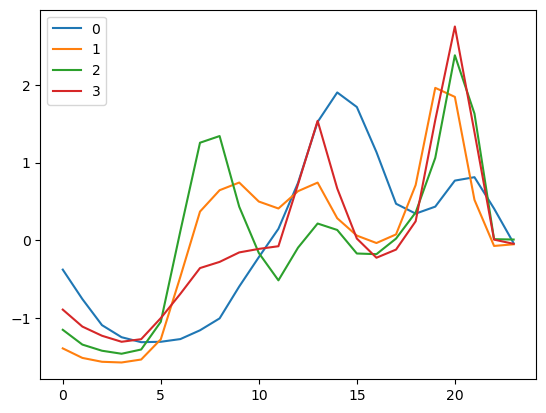

In [108]:
df_c.T.plot()

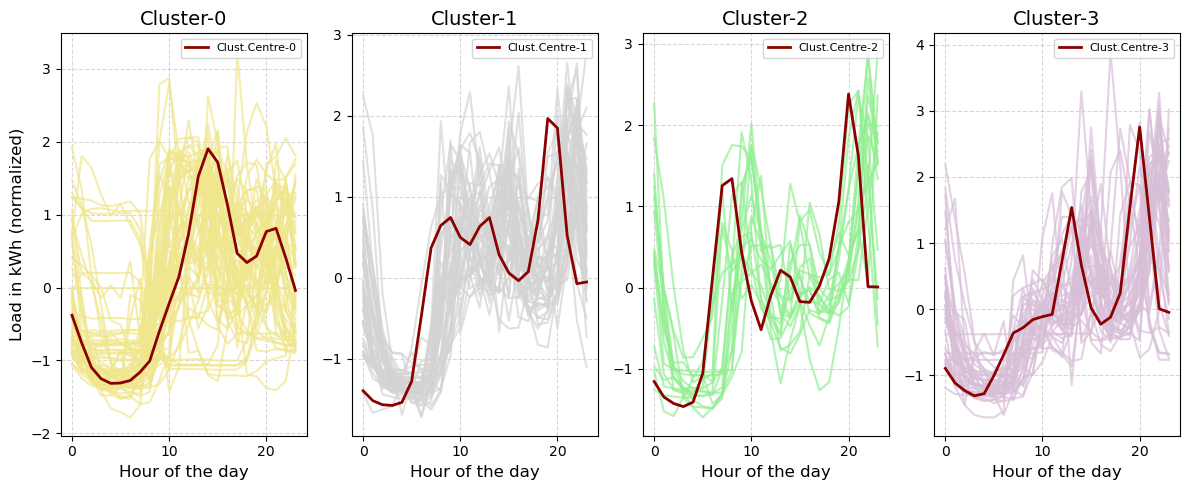

In [110]:
plt.figure(figsize=(12, 5))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X2a.reshape((X2a.shape[0], X2a.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh (normalized)', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
#     plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("goiner_kshape_cseg2.pdf", format='pdf', bbox_inches='tight')

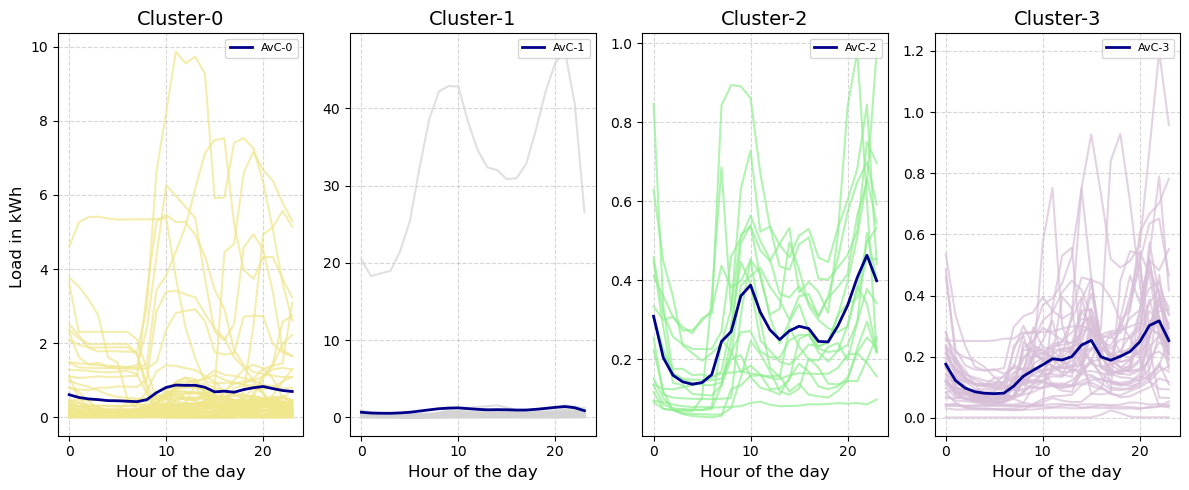

In [112]:
plt.figure(figsize=(12, 5))

colors = ['khaki', 'lightgrey', '#90EE90', 'thistle']  # Different color combinations

for i in range(n_clusters):
    ax = plt.subplot(1, n_clusters, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=14)
    
    X2b = X1.reshape((X2a.shape[0], X2.shape[1]))

    
    x1 = X2b[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = df_c.loc[i,:]
    x4 = x2.mean(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh ', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    plt.plot(x2, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
#     plt.plot(x3, linewidth=2, color='darkred', alpha=1, label=f'Clust.Centre-{i}')  # Cluster centroids with label
    plt.plot(x4, linewidth=2, color='darkblue', alpha=1, label=f'AvC-{i}') 
        
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=8)  # Add legend for cluster members and centroids

plt.tight_layout()
plt.savefig("goiner_kshape_cseg2_n.pdf", format='pdf', bbox_inches='tight')

In [89]:
X1.shape

(164, 24)

In [113]:
from tslearn.metrics import cdist_dtw
from tslearn.metrics import dtw
from sklearn.metrics import silhouette_score
silhouette_score(X, labels, metric=dtw)  

-0.4209611745549148

In [114]:
silhouette_score(X, labels) 

-0.398269281046863

In [115]:
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz_score(X, labels)

0.7141539727627578

In [116]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, labels)

4.438165345289321

In [94]:
#PMS with mean

y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

37.0 0.22560975609756098


NameError: name 'dmd_pk' is not defined

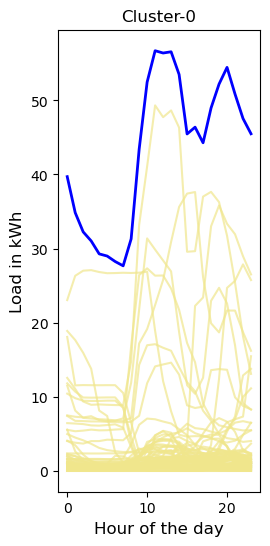

In [95]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming cluster_assignments_scaled, cluster_centers_scaled, and X are defined

plt.figure(figsize=(12, 6))

colors = ['khaki', 'orange', '#90EE90', 'thistle']  # Different color combinations

for i in range(3):
    ax = plt.subplot(1, 4, i+1)
    cluster_label = f'Cluster-{i}'
    ax.set_title(cluster_label, fontsize=12)
    
    x1 = X1[labels == i]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    
    ax.set_xlabel('Hour of the day', fontsize=12)
    if i == 0:
        ax.set_ylabel('Load in kWh', fontsize=12)  # Add ylabel only for the leftmost plot
#     ax.set_ylim(0, 5)
    
    
    plt.plot(x2*5, linewidth=1.5, color=colors[i], alpha=0.7)  # Cluster members with label
    plt.plot(x4, linewidth=2, color='blue', alpha=1, label=f'CCC-{i}')  # Cluster centroids with label
#     plt.plot(x3*5, linewidth=2, color='darkblue', alpha=1, label=f'RLC-{i}')  # Cluster centroids with label
    plt.plot(dmd_pk,linewidth = 2, color='red', label ='Demand')
    plt.grid(True, linestyle='--', alpha=0.5)
        
    plt.legend(loc='upper right', fontsize=10)  # Add legend for cluster members and centroids
    x4_array = np.array(x4[20:24]).reshape(-1, 1).T
    dmd_pk_array = np.array(dmd_pk[20:24]).reshape(-1, 1).T
    distances = euclidean_distances(x4_array, dmd_pk_array)
    sbdist = sbd_distance(x4_array, dmd_pk_array)
    print(i, distances,dtw(dmd_pk[20:24],x4[20:24]),sbdist)
plt.tight_layout()

# Save as PDF
plt.savefig("final/cc_kshape.pdf", format='pdf', bbox_inches='tight')

plt.show()

In [ ]:
X2b[labels == 1][0,:]

In [ ]:
xc[1, :].T.shape

In [ ]:

X2b[labels == 0][0,:].reshape(1,-1).shape

In [ ]:
#Shape based distance
import aeon
from aeon.distances import sbd_distance
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    for i in range(len(X[labels == j])):
        k = k + sbd_distance(xc[j, :].T, X2b[labels == j][i,:].reshape(1,-1))
print(k)

In [ ]:
peaks_indices = np.argmax(x4) 
peak_rlc = np.argmax(dmd_pk, axis=0)

In [ ]:
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
#     peak_rlc = np.argmax(xc[j, :])
    peak_rlc = np.argmax(np.mean(X[labels == j], axis=0))
    c[j,peak_rlc] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        k = k +1 
#         print (k,i+l,peaks_indices[i],peak_rlc, y[i+l,:],np.dot(c[j,:],y[i+l,:]))
    l = l + len(X[labels == j])
pms = pm/len(X)
print(pm, pms)

In [ ]:
peak_dem = np.argmax(dmd_pk, axis=0)

In [ ]:
peaks_indices

In [ ]:
def arsum(arr):
    n = len(arr)
    sum = 0
    for element in arr:
        sum+=element
    return sum

In [ ]:
dmd_pk=X.sum(axis=0).T
y = np. zeros((len(X), 24))
c = np. zeros((n_clusters,24))
pms = np. zeros((n_clusters,1))
pm = 0
k  = 0
l  = 0
for j in range(n_clusters):
    
    x1 = X1[labels == j]
    x2 = pd.DataFrame(x1).T
    x3 = x2.mean(axis=1)
    x4 = x2.sum(axis=1)
    peaks_indices = np.argmax(X1[labels == j], axis=1) 
    peak_dem = np.argmax(dmd_pk, axis=0)
    c[j,peak_dem] = 1
    for i in range(len(X[labels == j])):
        y[i+l,peaks_indices[i]] = 1
        pm = pm + np.dot(c[j,:],y[i+l,:])
        pms[j,:] = pms[j,:] + np.dot(c[j,:],y[i+l,:])/len(X[labels == j])
#         print(len(X[labels == j]))
    l = l + len(X[labels == j])
#     print(peaks_indices,pm)
print(pm)
print(pms)

In [ ]:
y[1,peaks_indices[:]]